## 1. Welcome to the world of data science!

<p>Throughout the world of data science, there are many languages and tools that can be used to complete a given task. While you are often able to use whichever tool you prefer, it is often important for analysts to work with similar platforms so that they can share their code with one another. Learning what professionals in the data science industry use while at work can help you gain a better understanding of things that you may be asked to do in the future. </p>
<p>In this project, we are going to find out what tools and languages professionals use in their day-to-day work. Our data comes from the <a href="https://www.kaggle.com/kaggle/kaggle-survey-2017?utm_medium=partner&utm_source=datacamp.com&utm_campaign=ml+survey+case+study">Kaggle Data Science Survey</a> which includes responses from over 10,000 people that write code to analyze data in their daily work.</p>

In [236]:
# Load necessary packages
library('tidyverse')

# Load the data
responses <- read_csv('datasets/kagglesurvey.csv')

# Print the first 10 rows
responses[1:10,]

Parsed with column specification:
cols(
  Respondent = col_double(),
  WorkToolsSelect = col_character(),
  LanguageRecommendationSelect = col_character(),
  EmployerIndustry = col_character(),
  WorkAlgorithmsSelect = col_character()
)


Respondent,WorkToolsSelect,LanguageRecommendationSelect,EmployerIndustry,WorkAlgorithmsSelect
1,"Amazon Web services,Oracle Data Mining/ Oracle R Enterprise,Perl",F#,Internet-based,"Neural Networks,Random Forests,RNNs"
2,"Amazon Machine Learning,Amazon Web services,Cloudera,Hadoop/Hive/Pig,Impala,Java,Mathematica,MATLAB/Octave,Microsoft Excel Data Mining,Microsoft SQL Server Data Mining,NoSQL,Python,R,SAS Base,SAS JMP,SQL,Tableau",Python,Mix of fields,"Bayesian Techniques,Decision Trees,Random Forests,Regression/Logistic Regression"
3,"C/C++,Jupyter notebooks,MATLAB/Octave,Python,R,TensorFlow",Python,Technology,"Bayesian Techniques,CNNs,Ensemble Methods,Neural Networks,Regression/Logistic Regression,SVMs"
4,"Jupyter notebooks,Python,SQL,TensorFlow",Python,Academic,"Bayesian Techniques,CNNs,Decision Trees,Gradient Boosted Machines,Neural Networks,Random Forests,Regression/Logistic Regression"
5,"C/C++,Cloudera,Hadoop/Hive/Pig,Java,NoSQL,R,Unix shell / awk",R,Government,NA
6,SQL,Python,Non-profit,NA
7,"Jupyter notebooks,NoSQL,Python,R,SQL,Unix shell / awk",Python,Internet-based,"CNNs,Decision Trees,Gradient Boosted Machines,Random Forests,Regression/Logistic Regression,SVMs"
8,"Python,Spark / MLlib,Tableau,TensorFlow,Other",Python,Mix of fields,"Bayesian Techniques,CNNs,HMMs,Neural Networks,Random Forests,Regression/Logistic Regression,SVMs"
9,"Jupyter notebooks,MATLAB/Octave,Python,SAS Base,SQL",Python,Financial,"Ensemble Methods,Gradient Boosted Machines"
10,"C/C++,IBM Cognos,MATLAB/Octave,Microsoft Excel Data Mining,Microsoft R Server (Formerly Revolution Analytics),Microsoft SQL Server Data Mining,Perl,Python,R,SQL,Unix shell / awk",R,Technology,"Bayesian Techniques,Regression/Logistic Regression"


## 2. Using multiple tools to solve mysteries in data!

<p>Now that we've loaded in the survey results, we want to focus on the tools and languages that the survey respondents use at work. From the above data frame, we can see that there are multiple tools so we would like to extract each one separately.</p>

In [254]:
# Create a new data frame called tools
tools <- responses

# Function to add a new column, and unnest the new column
work_tools <- function(x,y){
            x  %>% 
                mutate(work_tools = strsplit(y,',')) %>% unnest(work_tools)}

# View the first 6 rows of tools
tools <- work_tools(tools,tools$WorkToolsSelect)
head(tools)

Respondent,WorkToolsSelect,LanguageRecommendationSelect,EmployerIndustry,WorkAlgorithmsSelect,work_tools
1,"Amazon Web services,Oracle Data Mining/ Oracle R Enterprise,Perl",F#,Internet-based,"Neural Networks,Random Forests,RNNs",Amazon Web services
1,"Amazon Web services,Oracle Data Mining/ Oracle R Enterprise,Perl",F#,Internet-based,"Neural Networks,Random Forests,RNNs",Oracle Data Mining/ Oracle R Enterprise
1,"Amazon Web services,Oracle Data Mining/ Oracle R Enterprise,Perl",F#,Internet-based,"Neural Networks,Random Forests,RNNs",Perl
2,"Amazon Machine Learning,Amazon Web services,Cloudera,Hadoop/Hive/Pig,Impala,Java,Mathematica,MATLAB/Octave,Microsoft Excel Data Mining,Microsoft SQL Server Data Mining,NoSQL,Python,R,SAS Base,SAS JMP,SQL,Tableau",Python,Mix of fields,"Bayesian Techniques,Decision Trees,Random Forests,Regression/Logistic Regression",Amazon Machine Learning
2,"Amazon Machine Learning,Amazon Web services,Cloudera,Hadoop/Hive/Pig,Impala,Java,Mathematica,MATLAB/Octave,Microsoft Excel Data Mining,Microsoft SQL Server Data Mining,NoSQL,Python,R,SAS Base,SAS JMP,SQL,Tableau",Python,Mix of fields,"Bayesian Techniques,Decision Trees,Random Forests,Regression/Logistic Regression",Amazon Web services
2,"Amazon Machine Learning,Amazon Web services,Cloudera,Hadoop/Hive/Pig,Impala,Java,Mathematica,MATLAB/Octave,Microsoft Excel Data Mining,Microsoft SQL Server Data Mining,NoSQL,Python,R,SAS Base,SAS JMP,SQL,Tableau",Python,Mix of fields,"Bayesian Techniques,Decision Trees,Random Forests,Regression/Logistic Regression",Cloudera


## 3. Counting users of each working tool

<p>Now that we've split apart all of the tools used by each respondent, we can figure out which tools are the most popular.There were also missing information in responses which have been discarded here temporarily. </p>

In [255]:
# Create a new data frame
tool_count <- tools

# Group the data by work_tools, summarise the counts, and arrange in descending order
tool_count <- tool_count %>% filter(!is.na(tool_count$work_tools)) %>%
    group_by(work_tools)  %>% summarise(count = sum(!is.na(Respondent))) %>% 
    arrange(desc(count))
# Print the first 6 results
head(tool_count)

work_tools,count
Python,6073
R,4708
SQL,4261
Jupyter notebooks,3206
TensorFlow,2256
Amazon Web services,1868


## 4. So, which are the most popular tools?

<p>From the above table, Python is preferred by most of the professional for data analysis and machine learning followed by R, another powerful open source tool and SQL to access information stored in relational databases and datawarehouses. Now, let's see how our favorite tools stack up against the rest.</p>

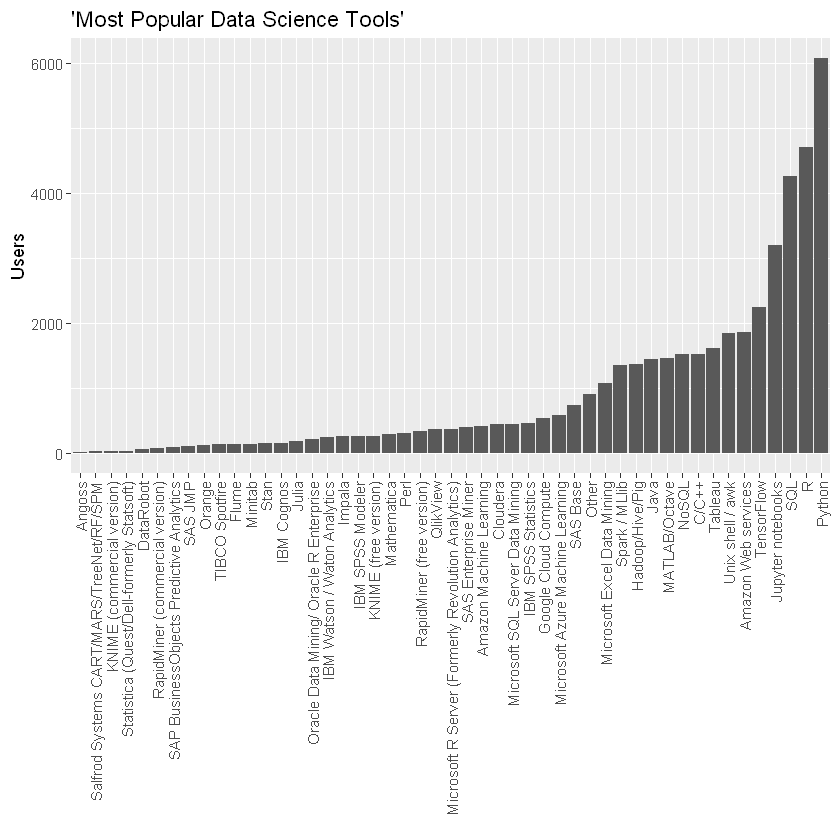

In [256]:
# Create a bar chart of the work_tools column, most counts on the far right
ggplot(tool_count,aes(x= reorder(work_tools,count),y=count)) + 
    geom_bar(stat ="identity") + theme(axis.text.x = element_text(angle=90,vjust = 0.5,hjust=1))+
    ggtitle("'Most Popular Data Science Tools'")+ xlab('') + ylab('Users')

## 5. The R vs Python debate

<p>Within the field of data science, there is a lot of debate among professionals about whether R or Python should reign supreme. You can see from our last figure that R and Python are the two most commonly used languages, but it's possible that many respondents use both R and Python. Let's take a look at how many people use R, Python, and both tools.</p>

In [257]:
# Create a new data frame called debate_tools
debate_tools <- responses

# Creat a new column called language preference

debate_tools <- debate_tools  %>% 
   mutate(language_preference = case_when(
       grepl('R',WorkToolsSelect) & !grepl("Python",WorkToolsSelect) ~"R",
       grepl('Python',WorkToolsSelect) & !grepl("R",WorkToolsSelect)~"Python",
       grepl('R',WorkToolsSelect) & grepl("R",WorkToolsSelect)~"both",
       grepl('[^R]',WorkToolsSelect) | grepl("[^Python]",WorkToolsSelect)~"neither"
   ))

# Print the first 6 rows
head(debate_tools)

Respondent,WorkToolsSelect,LanguageRecommendationSelect,EmployerIndustry,WorkAlgorithmsSelect,language_preference
1,"Amazon Web services,Oracle Data Mining/ Oracle R Enterprise,Perl",F#,Internet-based,"Neural Networks,Random Forests,RNNs",R
2,"Amazon Machine Learning,Amazon Web services,Cloudera,Hadoop/Hive/Pig,Impala,Java,Mathematica,MATLAB/Octave,Microsoft Excel Data Mining,Microsoft SQL Server Data Mining,NoSQL,Python,R,SAS Base,SAS JMP,SQL,Tableau",Python,Mix of fields,"Bayesian Techniques,Decision Trees,Random Forests,Regression/Logistic Regression",both
3,"C/C++,Jupyter notebooks,MATLAB/Octave,Python,R,TensorFlow",Python,Technology,"Bayesian Techniques,CNNs,Ensemble Methods,Neural Networks,Regression/Logistic Regression,SVMs",both
4,"Jupyter notebooks,Python,SQL,TensorFlow",Python,Academic,"Bayesian Techniques,CNNs,Decision Trees,Gradient Boosted Machines,Neural Networks,Random Forests,Regression/Logistic Regression",Python
5,"C/C++,Cloudera,Hadoop/Hive/Pig,Java,NoSQL,R,Unix shell / awk",R,Government,NA,R
6,SQL,Python,Non-profit,NA,neither


## 6. R vs Python users

<p>Now we just need to take a closer look at how many respondents use R, Python, and both!</p>

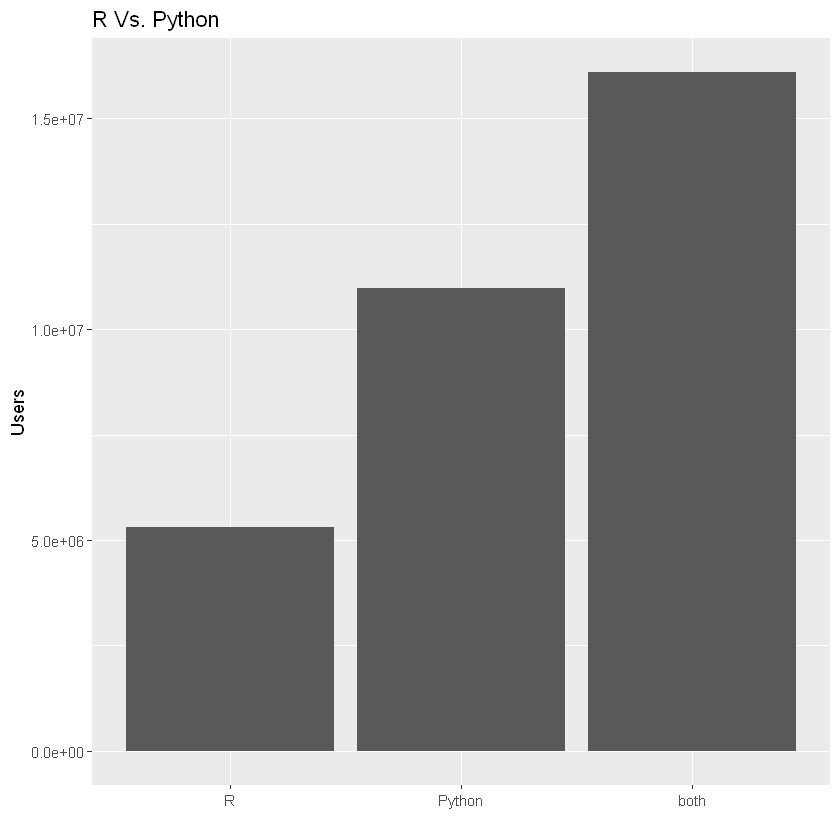

In [258]:
# Create a new data frame
debate_plot <- debate_tools

# Group by language preference, calculate number of responses, and remove "neither"
debate_plot <- debate_plot  %>% 
   group_by(language_preference)  %>% 
   summarise(count = sum(Respondent))  %>% 
    filter(language_preference != "neither")

# Create a bar chart
ggplot(debate_plot,aes(x=reorder(language_preference,count),y=count)) + 
    geom_bar(stat="identity")+ ggtitle("R Vs. Python") + xlab('') + ylab('Users')

## 7. Well, where are they mostly used?

<p> Most of our respondants prefer both the tools; R and Python but comparing these two languages, Python has significant number of users working and contributing to the community. But, where are these tools used? Does the industry you are working on prefer their own tools? Let's find out! </p>

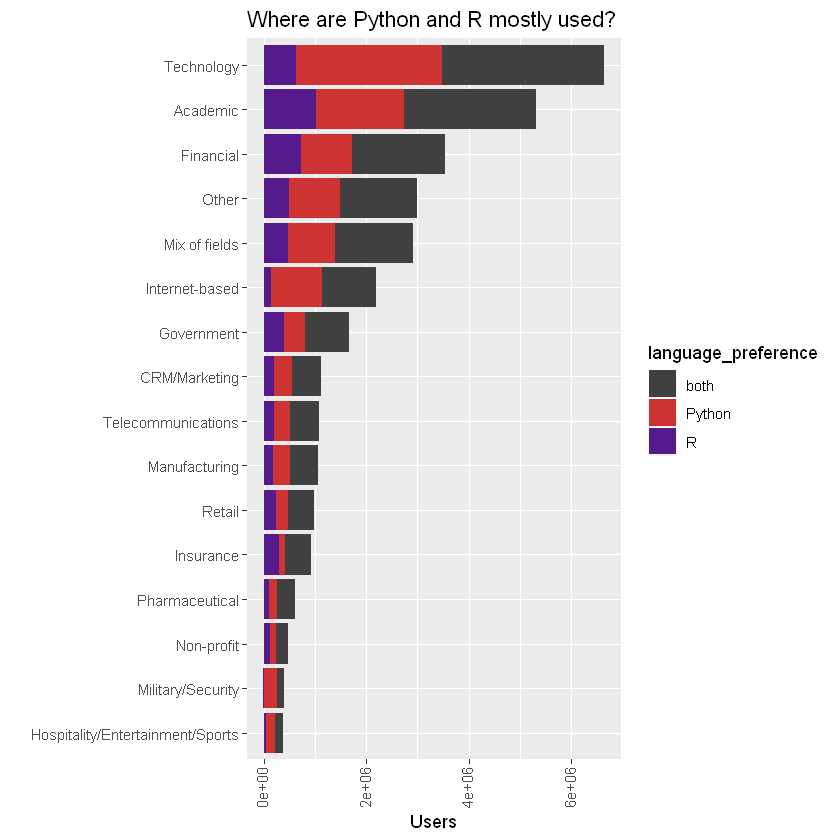

In [259]:
#Create a new dataframe

industry_tools <- debate_tools

#Filter industries removing NA and grouping industries
industry_tools <- industry_tools %>% filter(!is.na(EmployerIndustry),
                                            !is.na(language_preference),
                                            language_preference!='neither') %>%
    group_by(EmployerIndustry,language_preference) %>% 
    summarise(users = sum(Respondent))

plot_industry <- function(x){
    ggplot(industry_tools,aes(x=reorder(EmployerIndustry,users),y=users,fill=language_preference)) + 
 geom_bar(position="stack",stat="identity") + coord_flip()+
       theme(axis.text.x = element_text(angle=90,vjust=0.3,hjust=1)) + 
       scale_fill_manual(values = c('gray25','brown3','purple4'))+ggtitle('Where are Python and R mostly used?')+
        xlab('') + ylab('Users')}
plot_industry(industry_tools)

## 8. Industries making use of big data

<p>Industries like technological services, educational institues and financial organization are using R and Python mostly for their data science task. As we know these tools helps to easily perfom data manipulation, analysis and machine learning over structured and unstructured data. But, what amount of data are the respondents dealing with? Let's explore how familiar are they with big data tools and techniques. We will use some names of architecure & tools such as hadoop, hive, spark and so forth fundamentally used to process the abundance volume, variety and velocity of data.  </p>

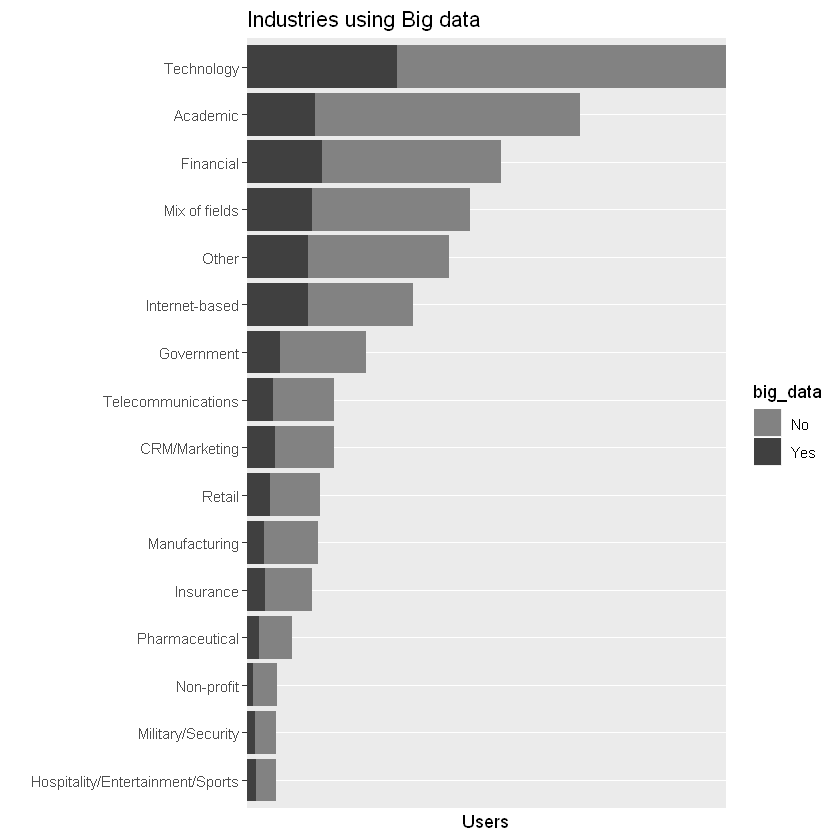

In [260]:
#Create a new dataframe
big_data_tools <- tools
#Filter big data tools, group_by industries and summarise
big_data_tools <- big_data_tools %>%
                    mutate(big_data = case_when(
       grepl('Hadoop',work_tools)~"Yes",
       grepl('Spark',work_tools)~"Yes",
       grepl('Hive',work_tools)~"Yes",
       grepl("Cloudera",work_tools)~"Yes",
       grepl('Pig',work_tools)~"Yes" ,
       grepl('Java',work_tools)~"Yes" ,
       grepl('SQL',work_tools)~"Yes",
       grepl('Amazon',work_tools)~"Yes",
       grepl('Cloud',work_tools)~"Yes",
       grepl("[^(Hadoop,Spark,Hive,Pig,Java)]",work_tools)~"No",
       TRUE ~ "No"))
#Plot industries with big_data tools

big_data_plot <- big_data_tools %>% filter(!is.na(EmployerIndustry)) %>%
                        group_by(EmployerIndustry,big_data) %>%
                        summarise(users = sum(Respondent))
ggplot(big_data_plot,aes(x=reorder(EmployerIndustry,users),y=users,fill=big_data)) + 
geom_bar(position = "stack",stat = "identity") + coord_flip()+
       theme(axis.text.x = element_text(angle=90,vjust=0.3,hjust=1)) + 
       scale_fill_manual(values = c('grey51','gray25')) + xlab('') + ylab('Users') + scale_y_discrete()+
        ggtitle("Industries using Big data")

## 9. Language recommendations for new ones!

<p>It looks like the largest group of professionals program in both Python and R using big data to process and deliver insights in their repective organization. All what we have today is tremendous amount of data with increasing demand of professionals with these skills. But for a person transitioning to this field or someone completely new, which language do preofessionals recommend? Do R lovers always recommend R?</p>

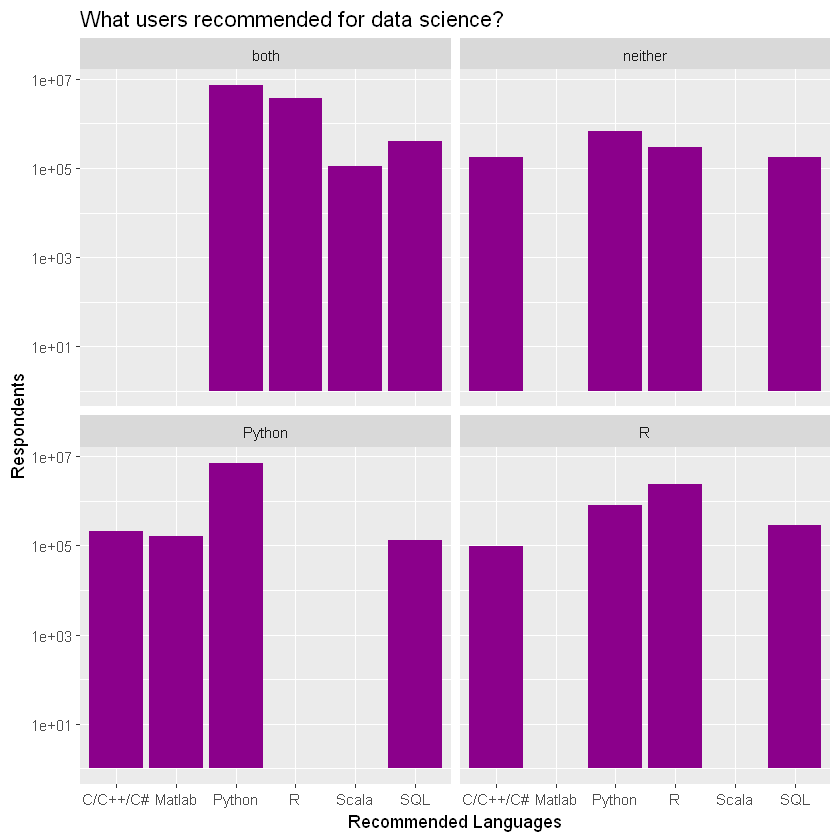

In [350]:
# Create a new data frame
recommendations <- debate_tools

# Group by, summarise, filter, arrange, mutate, and filter

recommendations <- recommendations  %>% 
    group_by(language_preference,LanguageRecommendationSelect)  %>% 
    summarise(count = sum(Respondent)) %>% 
    filter(language_preference != 'NA',LanguageRecommendationSelect != 'NA') %>%
    arrange(language_preference,desc(count)) %>% 
    mutate(LanguageRecommendationSelect, row_number()) %>%
    filter(between(row_number(),1,4))

#Plot recommendations

barplot <- ggplot(recommendations,aes(x = LanguageRecommendationSelect,y=count)) + geom_bar(stat="identity",fill="magenta4",width=0.9) + facet_wrap(~language_preference)                                                                        
barplot + xlab('Recommended Languages')+ylab('Respondents') + scale_y_log10()+ ggtitle('What users recommended for data science?')

## 10. 'Let machine do the dirty work.' But, how?

<p>The most recommended language from the users is Python following with R, especially R users recommend on what they are working. Although data science requires expertise in multiple disciplines like coding skills to acquire big data and perform analysis and mathematics for machine learning, it is always better to understand popular algorithms that are used to train and validate the model for prediction, forecasting, and other different purposes. So, which algorithms are mostly used across people? What are they trying to say from their data?</p>

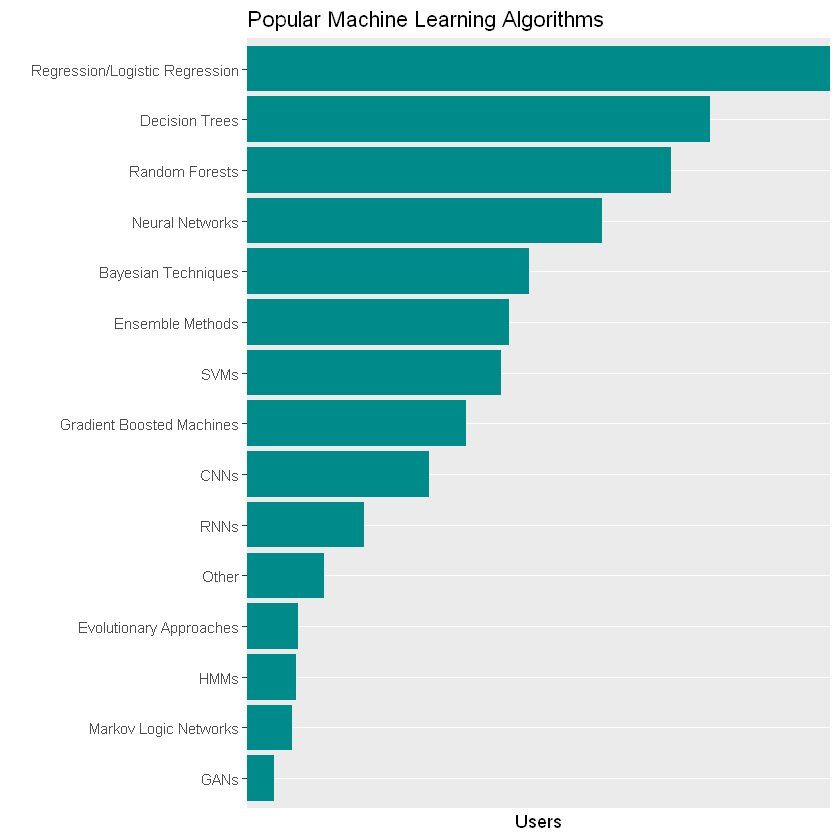

In [336]:
algo_tools <- debate_tools %>% mutate(algorithm = strsplit(WorkAlgorithmsSelect,',')) %>%
                unnest(algorithm)
algo_count <- algo_tools %>% filter(!is.na(algorithm),!is.na(language_preference)) %>%
                group_by(algorithm) %>%
                summarise(users = sum(Respondent)) %>%
                arrange(algorithm,desc(users))
ggplot(algo_count,aes(x=reorder(algorithm,users),y=users)) + 
geom_bar(stat = "identity",fill = 'cyan4') + coord_flip() +
       theme(axis.text.x = element_text(angle=90,vjust=0.3,hjust=1)) + xlab('') + 
        ylab('Users') + scale_y_discrete() + ggtitle("Popular Machine Learning Algorithms")

<h5>It is evident that people who attended Kaggle's survey mostly use supersived learning approaches for data science. Algorithms like Regression are used to predict continuous target variable whereas other frequently used ones fall under classification techniques used to predict unknown labels from previous labeled examples. Finally, as per industrial requirements and Data scientist preferences, the most useful tools to learn are Python, R and SQL with better understanding of machine learning algorithms like Regression/Logistic Regression, Decision Trees and Ensemble Methods.</h5>